In [4]:
import pandas  as pd
data = pd.read_excel('./data/부산_디지털배움터.xlsx',index_col=0)

In [5]:
data.head()

,지역구,배움터명,실제교육장소,교육방식,과정,교육명,시작일자,종료일자,시작시간,종료시간,강사,서포터즈
NO,,,,,,,,,,,,
1,총괄,부산역 유라시아 플랫폼,NaN,집합,생활,집에서 만나는 장보기,2021-08-02,2021-08-06,14:00,17:30,김정화,조영성
2,총괄,부산역 유라시아 플랫폼,NaN,집합,기초,언택트시대 슬기로운 화상솔루션과 웨일온,2021-08-04,2021-08-06,09:30,13:00,강영애,김희용
3,총괄,부산역 유라시아 플랫폼,NaN,집합,기초,"SNS 기초_카카오톡, 카카오스토리",2021-08-09,2021-08-13,09:30,13:00,강영애,김희용
4,총괄,부산역 유라시아 플랫폼,NaN,집합,생활,구글앱 활용1,2021-08-09,2021-08-13,14:00,17:30,김정화,조영성
5,총괄,부산역 유라시아 플랫폼,NaN,집합,생활,편리한 교통과 장보기,2021-08-17,2021-08-20,09:30,13:00,강영애,김희용


In [6]:
#집합으로 묶기 금정구청 제거 문화복합센터 제거
data = data[(data['교육방식'] == '집합')& (data['배움터명'] != '금정구청 본관 4층 전산교육장') & (data['배움터명'] != '문화복합센터') ]

#초등 대상 확인


In [7]:
#초등학생 대상 
not_choding=data[~data['교육명'].str.contains('초등학생 대상')]

In [8]:
#초등학교 2~3학년 삭제
final=not_choding[~not_choding['교육명'].str.contains('초등학교 2~3학년 대상')]

In [9]:
count_val = final['교육명'].value_counts().reset_index()

In [10]:
count_val[count_val['교육명']>1]
# 민원서류 쉽게 준비하기 ,내가 만드는 포토북과 스마트한 일기책,언택트시대 슬기로운 화상솔루션,재미 있는 카드 뉴스 만들기,스마트폰 기초 및 앱 활용하기
video = ['나도 이제 사진작가', '키네마스터 앱을 활용한 동영상 만들기','스마트 앱을 활용한 동영상만들기(초급부터 고급까지)','사진앱 포토 동영상과 클라우드 관리하기','편리한 어플리케이션','유튜브 슬기롭게 활용하기','편리한 교통 생활','편리한 교통과 장보기']  # "이미지/동영상 제작편집"
computer = ['친절한 스마트씨!(스마트폰 기초)','컴퓨터 기초(윈도우10)','윈도우10 파일과 폴더 활용'] # '컴퓨터/모바일 기기 관리
use_it = ['키오스크와 함께 스마트한 생활','스마트한 키오스크 생활과 앱활용'] #다양한 IT기기 이용방법
sns = ['SNS 기초_카카오톡, 카카오스토리','SNS 스타_인스타그램','앱으로 소통하기 SNS(네이버밴드)'] #sns 활용
showping = ['집에서 만나는 장보기'] #쇼핑
jeoung_bu = ['(공공앱) 스마트한 부산 교통정보','(공공앱) 앱으로 떠나는 흥미로운 부산여행',
             '(공공앱) 앱으로 관리하는 우리가족 건강관리',
             '(공공앱) 손쉽게 소통하는 편리한 민원',
             '(공공앱) 내 손안의 우체국'
            ] # 정부행정서비스
make_moon = ['한글초급_한글 친해지기','한글초급_한글 이미지와 도형 활용',
             '오피스 엑셀 기초',
             '파워포인트초급_표와 차트 활용',
             '파워포인트초급_파워포인트와 친해지기',
             '파워포인트초급_워드아트와 스마트아트 활용',
             '한글초급_한글 표와 차트 활용',
             '핵심내용으로 구성된 초급엑셀실무 TIP'] #문서 작성
security = ['후후로 보이스피싱 없는 세상'] #정보 보안
blog = ['블로그만들기1','모두 홈페이지 PC버전','블로그만들기2'] #개인블로그 및 카페 개설활용 방법
def change_val(x):
    if x in video:
        return "이미지/동영상 제작편집"
    elif x in computer:
        return  '컴퓨터/모바일 기기 관리'
    elif x in use_it:
        return '다양한 IT기기 이용방법'
    elif x in sns:
        return 'sns 활용'
    elif x in showping:
        return '쇼핑'
    elif x in jeoung_bu:
        return '정부 행정서비스'
    elif x in make_moon:
        return '문서 작성'
    elif x in security:
        return '정보 보안'
    elif x in blog:
        return '개인블로그 및 카페 개설활용 방법'
    else:
        return x

final['묶음'] = final['교육명'].apply(lambda x : change_val(x))
final.head()

<ipython-input-10-afa2b4fbb8fe>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['묶음'] = final['교육명'].apply(lambda x : change_val(x))


,지역구,배움터명,실제교육장소,교육방식,과정,교육명,시작일자,종료일자,시작시간,종료시간,강사,서포터즈,묶음
NO,,,,,,,,,,,,,
1,총괄,부산역 유라시아 플랫폼,NaN,집합,생활,집에서 만나는 장보기,2021-08-02,2021-08-06,14:00,17:30,김정화,조영성,쇼핑
2,총괄,부산역 유라시아 플랫폼,NaN,집합,기초,언택트시대 슬기로운 화상솔루션과 웨일온,2021-08-04,2021-08-06,09:30,13:00,강영애,김희용,언택트시대 슬기로운 화상솔루션과 웨일온
3,총괄,부산역 유라시아 플랫폼,NaN,집합,기초,"SNS 기초_카카오톡, 카카오스토리",2021-08-09,2021-08-13,09:30,13:00,강영애,김희용,sns 활용
4,총괄,부산역 유라시아 플랫폼,NaN,집합,생활,구글앱 활용1,2021-08-09,2021-08-13,14:00,17:30,김정화,조영성,구글앱 활용1
5,총괄,부산역 유라시아 플랫폼,NaN,집합,생활,편리한 교통과 장보기,2021-08-17,2021-08-20,09:30,13:00,강영애,김희용,이미지/동영상 제작편집


In [17]:
final.to_csv('./data/부산디지털_묶음.csv',encoding='euc-kr')

In [18]:
final['묶음'].value_counts()

이미지/동영상 제작편집                62
문서 작성                       41
정부 행정서비스                    38
컴퓨터/모바일 기기 관리               26
sns 활용                      23
                            ..
ITQ파워포인트_텍스트/동영상 슬라이드        1
스마트폰 앱을 활용한 동영상만들기           1
(공공앱) 폰으로 즐기는 방송             1
(초등4학년 이상) 나는야 유튜브 크리에이터     1
친절한 스마트씨!(스마트폰 기초) 및 앱활용     1
Name: 묶음, Length: 78, dtype: int64

In [19]:
data = pd.read_csv('./data/부산디지털_묶음.csv', encoding = 'euc-kr')
data.head()

,NO,지역구,배움터명,실제교육장소,교육방식,과정,교육명,시작일자,종료일자,시작시간,종료시간,강사,서포터즈,묶음
0,1,총괄,부산역 유라시아 플랫폼,NaN,집합,생활,집에서 만나는 장보기,2021-08-02,2021-08-06,14:00,17:30,김정화,조영성,쇼핑
1,2,총괄,부산역 유라시아 플랫폼,NaN,집합,기초,언택트시대 슬기로운 화상솔루션과 웨일온,2021-08-04,2021-08-06,09:30,13:00,강영애,김희용,언택트시대 슬기로운 화상솔루션과 웨일온
2,3,총괄,부산역 유라시아 플랫폼,NaN,집합,기초,"SNS 기초_카카오톡, 카카오스토리",2021-08-09,2021-08-13,09:30,13:00,강영애,김희용,sns 활용
3,4,총괄,부산역 유라시아 플랫폼,NaN,집합,생활,구글앱 활용1,2021-08-09,2021-08-13,14:00,17:30,김정화,조영성,구글앱 활용1
4,5,총괄,부산역 유라시아 플랫폼,NaN,집합,생활,편리한 교통과 장보기,2021-08-17,2021-08-20,09:30,13:00,강영애,김희용,이미지/동영상 제작편집


In [20]:
data['묶음'].value_counts()

이미지/동영상 제작편집                62
문서 작성                       41
정부 행정서비스                    38
컴퓨터/모바일 기기 관리               26
sns 활용                      23
                            ..
ITQ파워포인트_텍스트/동영상 슬라이드        1
스마트폰 앱을 활용한 동영상만들기           1
(공공앱) 폰으로 즐기는 방송             1
(초등4학년 이상) 나는야 유튜브 크리에이터     1
친절한 스마트씨!(스마트폰 기초) 및 앱활용     1
Name: 묶음, Length: 78, dtype: int64

In [21]:
computer = ['문서 작성','컴퓨터/모바일 기기 관리','정보 보안']#컴퓨터 기초
life_service = ['다양한 IT기기 이용방법','정부 행정서비스',] #생활 서비스
social = ['sns 활용','개인블로그 및 카페 개설활용 방법','쇼핑','온라인 판매 채널 개설 및 운영']#소셜 미디어
media = ['이미지/동영상 제작편집',] #미디어 창작/앱 개발
new_tech = ['빅데이터','드론 제작 및 조종']#새로운 기기 기술 체험 및 활용법
def big_change(x):
    if x in computer:
        return '컴퓨터 기초'
    elif x in life_service:
        return '생활 서비스'
    elif x in social:
        return '소셜 미디어'
    elif x in media:
        return '미디어 창작/앱 개발'
    elif x in new_tech:
        return '새로운 기기 기술 체험 및 활용법'
    else :
        return x
    
    
    
data['대분류'] = data['묶음'].apply(lambda x : big_change(x))
data.rename(columns = {'묶음' : '소분류'}, inplace = True)
data['대분류'].value_counts()


컴퓨터 기초                                  73
미디어 창작/앱 개발                             62
생활 서비스                                  59
소셜 미디어                                  43
민원서류 쉽게 준비하기                             5
                                        ..
윈도우10 파일과 폴더 활용&오피스 엑셀 기초                1
(초등학교 4학년 이상) 키네마스터 앱을 활용한 동영상 만들기       1
키네마스터 앱을 활용한 동영상 만들기 & 유튜브 슬기롭게 활용하기     1
네이버 스마트스토어                               1
(초등4학년 이상) 나는야 유튜브 크리에이터                 1
Name: 대분류, Length: 73, dtype: int64

In [22]:
data['소분류'].value_counts()

이미지/동영상 제작편집                62
문서 작성                       41
정부 행정서비스                    38
컴퓨터/모바일 기기 관리               26
sns 활용                      23
                            ..
ITQ파워포인트_텍스트/동영상 슬라이드        1
스마트폰 앱을 활용한 동영상만들기           1
(공공앱) 폰으로 즐기는 방송             1
(초등4학년 이상) 나는야 유튜브 크리에이터     1
친절한 스마트씨!(스마트폰 기초) 및 앱활용     1
Name: 소분류, Length: 78, dtype: int64

In [23]:
data.to_csv('./data/부산디지털_묶음_정리.csv')

In [31]:
data = pd.read_csv('./data/부산디지털_묶음_정리.csv')

In [32]:
data.head()

,Unnamed: 0,NO,지역구,배움터명,실제교육장소,교육방식,과정,교육명,시작일자,종료일자,시작시간,종료시간,강사,서포터즈,소분류,대분류
0,0,1,총괄,부산역 유라시아 플랫폼,NaN,집합,생활,집에서 만나는 장보기,2021-08-02,2021-08-06,14:00,17:30,김정화,조영성,쇼핑,소셜 미디어
1,1,2,총괄,부산역 유라시아 플랫폼,NaN,집합,기초,언택트시대 슬기로운 화상솔루션과 웨일온,2021-08-04,2021-08-06,9:30,13:00,강영애,김희용,기타,기타
2,2,3,총괄,부산역 유라시아 플랫폼,NaN,집합,기초,"SNS 기초_카카오톡, 카카오스토리",2021-08-09,2021-08-13,9:30,13:00,강영애,김희용,sns 활용,소셜 미디어
3,3,4,총괄,부산역 유라시아 플랫폼,NaN,집합,생활,구글앱 활용1,2021-08-09,2021-08-13,14:00,17:30,김정화,조영성,컴퓨터/모바일 기기 관리,컴퓨터 기초
4,4,5,총괄,부산역 유라시아 플랫폼,NaN,집합,생활,편리한 교통과 장보기,2021-08-17,2021-08-20,9:30,13:00,강영애,김희용,이미지/동영상 제작편집,미디어 창작/앱 개발


In [33]:
big=data['대분류'].value_counts().reset_index()

In [34]:
big.columns

Index(['index', '대분류'], dtype='object')

In [35]:
big

,index,대분류
0,컴퓨터 기초,102
1,미디어 창작/앱 개발,88
2,생활 서비스,71
3,소셜 미디어,50
4,기타,7
5,새로운 기기 기술 체험 및 활용법,4


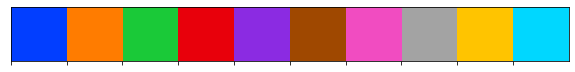

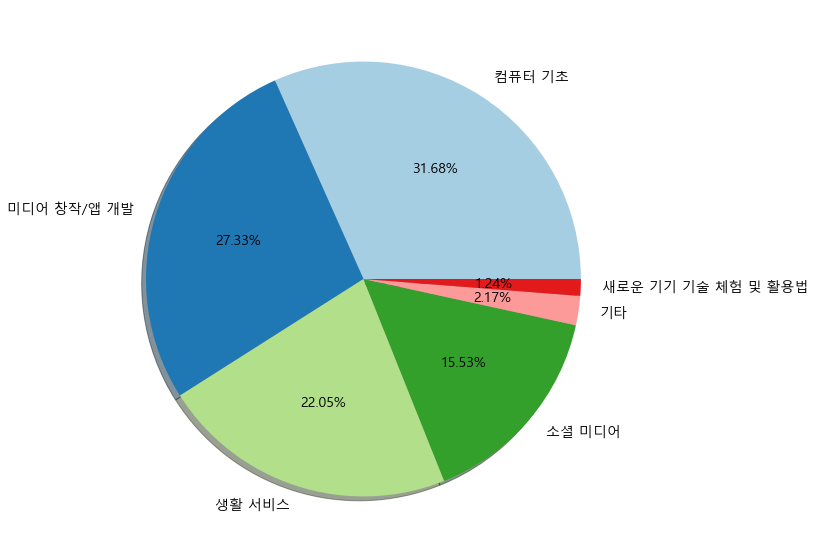

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Malgun Gothic"
palette = sns.color_palette('bright')
sns.palplot(palette)
sns.set_palette('Paired')
fig = plt.figure(figsize = (10,10))
plt.pie(big['대분류'],
        labels=big['index'],
        autopct = '%1.2f%%',
        shadow = True,
        textprops = {'fontsize':14}
        
       )
plt.show()


In [37]:
big.to_csv('./data/pieplot.csv', encoding = 'euc-kr')

PermissionError: [Errno 13] Permission denied: './data/pieplot.csv'